TRABALHO FINAL APLICAÇÕES DE BIG DATA E DATA SCIENCE COM FOCO EM MARKETING

Prof. Sergio Assunção Monteiro

Discentes: Caroline Araújo de Oliveira, Elidio Florentino da Silva Junior, Laís Cosmo Lopes, Marcelo Martins Simão, Valter Santos Guimarães e Vanessa Machado e Silva Gomide.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as npw
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# Load the data
df = pd.read_csv("/content/perfis_usuarios_uber_10000_linhas.csv")

In [ ]:
print("Visualização das primeiras 5 linhas do DataFrame:")
display(df.head())

Visualização das primeiras 5 linhas do DataFrame:


,ID_Usuario,Idade,Gênero,Numero_de_Viagens,Gasto_Medio_por_Viagem,Nivel_de_Membresia,Metodo_de_Pagamento_Preferido,Dispositivo_Usado,Ano_de_Registro,Media_Aceitacao_Primeira_Oferta,Media_Aceitacao_Segunda_Oferta,Taxa_Media_Desistencia
0,1,56,Masculino,260,23.96,Ouro,Cartão de Crédito,Android,2019,165,25,13
1,2,46,Feminino,121,21.49,Prata,PayPal,Android,2017,60,28,20
2,3,32,Masculino,412,17.19,Bronze,PayPal,Android,2019,44,30,19
3,4,25,Masculino,145,23.34,Ouro,Cartão de Débito,iPhone,2018,323,24,6
4,5,38,Feminino,446,30.29,Prata,PayPal,Android,2016,382,17,19


In [ ]:
print("\nInformações gerais sobre o DataFrame:")
df.info()


Informações gerais sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Usuario                       10000 non-null  int64  
 1   Idade                            10000 non-null  int64  
 2   Gênero                           10000 non-null  object 
 3   Numero_de_Viagens                10000 non-null  int64  
 4   Gasto_Medio_por_Viagem           10000 non-null  float64
 5   Nivel_de_Membresia               10000 non-null  object 
 6   Metodo_de_Pagamento_Preferido    10000 non-null  object 
 7   Dispositivo_Usado                10000 non-null  object 
 8   Ano_de_Registro                  10000 non-null  int64  
 9   Media_Aceitacao_Primeira_Oferta  10000 non-null  int64  
 10  Media_Aceitacao_Segunda_Oferta   10000 non-null  int64  
 11  Taxa_Media_Desistencia           10000 non

In [ ]:
print("\nDescrição estatística das colunas numéricas:")
display(df.describe())


Descrição estatística das colunas numéricas:


,ID_Usuario,Idade,Numero_de_Viagens,Gasto_Medio_por_Viagem,Ano_de_Registro,Media_Aceitacao_Primeira_Oferta,Media_Aceitacao_Segunda_Oferta,Taxa_Media_Desistencia
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,38.546400,273.396300,25.078900,2018.47120,243.317600,27.165000,12.481900
std,2886.89568,12.014287,130.157593,5.788589,2.28322,118.566375,13.029557,6.950015
min,1.00000,18.000000,50.000000,15.000000,2015.00000,40.000000,5.000000,1.000000
25%,2500.75000,28.000000,160.000000,20.100000,2016.00000,141.000000,16.000000,6.000000
50%,5000.50000,39.000000,272.000000,25.110000,2018.00000,243.000000,27.000000,12.000000
75%,7500.25000,49.000000,386.000000,30.110000,2020.00000,347.000000,38.000000,19.000000
max,10000.00000,59.000000,499.000000,35.000000,2022.00000,449.000000,49.000000,24.000000


In [ ]:
# Função para remover casas decimais de números inteiros
def formatar_describe(val):
    return "{:.0f}".format(val) if val == int(val) else "{:.2f}".format(val)


# Descrição estatística formatada
descricao_formatada = df.describe().applymap(formatar_describe)

# Exibindo a descrição formatada
print("Descrição estatística com formatação:")
display(descricao_formatada)

Descrição estatística com formatação:


<ipython-input-5-bb3d6795a05f>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  descricao_formatada = df.describe().applymap(formatar_describe)


,ID_Usuario,Idade,Numero_de_Viagens,Gasto_Medio_por_Viagem,Ano_de_Registro,Media_Aceitacao_Primeira_Oferta,Media_Aceitacao_Segunda_Oferta,Taxa_Media_Desistencia
count,10000,10000,10000,10000,10000,10000,10000,10000
mean,5000.50,38.55,273.40,25.08,2018.47,243.32,27.16,12.48
std,2886.90,12.01,130.16,5.79,2.28,118.57,13.03,6.95
min,1,18,50,15,2015,40,5,1
25%,2500.75,28,160,20.10,2016,141,16,6
50%,5000.50,39,272,25.11,2018,243,27,12
75%,7500.25,49,386,30.11,2020,347,38,19
max,10000,59,499,35,2022,449,49,24


In [ ]:
print("\nVerificando a existência de valores ausentes em cada coluna:")
display(df.isnull().sum())


Verificando a existência de valores ausentes em cada coluna:


,0
ID_Usuario,0
Idade,0
Gênero,0
Numero_de_Viagens,0
Gasto_Medio_por_Viagem,0
Nivel_de_Membresia,0
Metodo_de_Pagamento_Preferido,0
Dispositivo_Usado,0
Ano_de_Registro,0
Media_Aceitacao_Primeira_Oferta,0


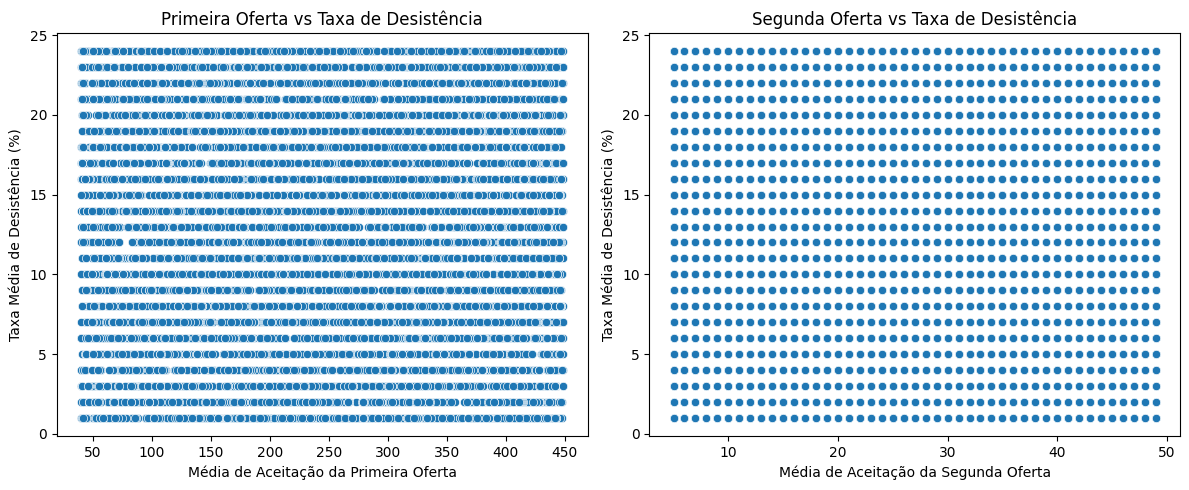

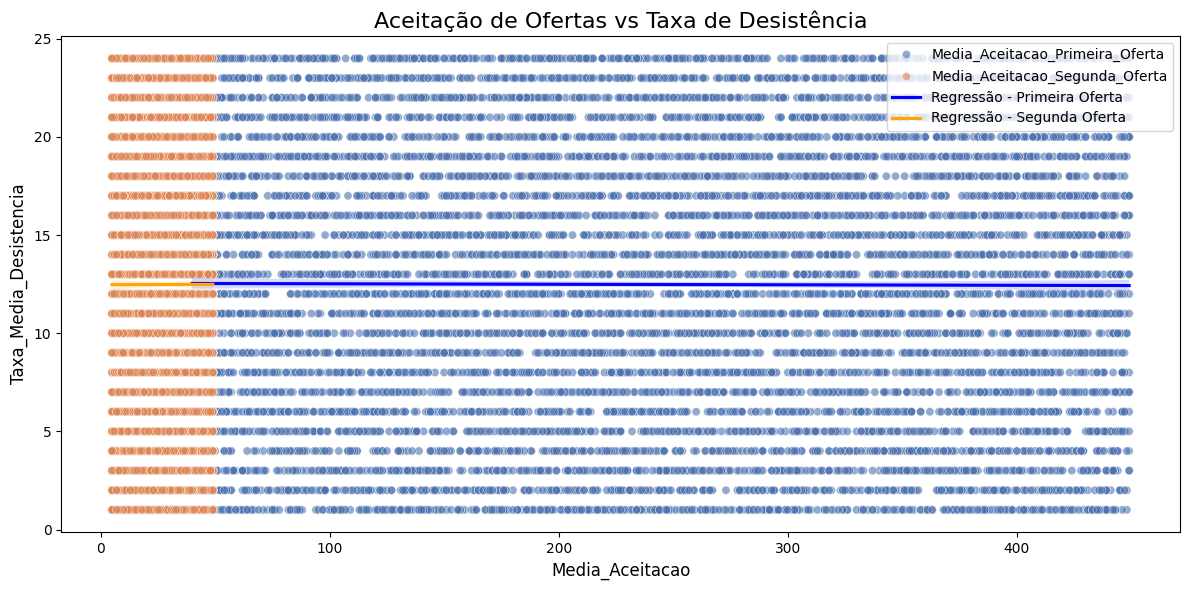

Correlação entre Média de Aceitação da Primeira Oferta e Taxa Média de Desistência: -0.0045
Correlação entre Média de Aceitação da Segunda Oferta e Taxa Média de Desistência: 0.0006


In [ ]:
# 1. Gráficos relacionando Media_Aceitacao_Primeira_Oferta e Media_Aceitacao_Segunda_Oferta com Taxa_Media_Desistencia

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Media_Aceitacao_Primeira_Oferta', y='Taxa_Media_Desistencia', data=df)
plt.title('Primeira Oferta vs Taxa de Desistência')
plt.xlabel('Média de Aceitação da Primeira Oferta')
plt.ylabel('Taxa Média de Desistência (%)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Media_Aceitacao_Segunda_Oferta', y='Taxa_Media_Desistencia', data=df)
plt.title('Segunda Oferta vs Taxa de Desistência')
plt.xlabel('Média de Aceitação da Segunda Oferta')
plt.ylabel('Taxa Média de Desistência (%)')

plt.tight_layout()
plt.show()

# Reshape the data for plotting
df_melted = pd.melt(
    df,
    id_vars=["Taxa_Media_Desistencia"],
    value_vars=["Media_Aceitacao_Primeira_Oferta", "Media_Aceitacao_Segunda_Oferta"],
    var_name="Tipo_de_Aceitacao",
    value_name="Media_Aceitacao",
)

# Create the plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Media_Aceitacao",
    y="Taxa_Media_Desistencia",
    hue="Tipo_de_Aceitacao",
    data=df_melted,
    palette="deep",
    alpha=0.6,
)

plt.title("Aceitação de Ofertas vs Taxa de Desistência", fontsize=16)
plt.xlabel("Média de Aceitação da Oferta", fontsize=12)
plt.ylabel("Taxa Média de Desistência (%)", fontsize=12)
plt.legend(title="Tipo de Aceitação", title_fontsize="12", fontsize="10")

# Add a regression line for each type of acceptance
sns.regplot(
    x="Media_Aceitacao",
    y="Taxa_Media_Desistencia",
    data=df_melted[df_melted["Tipo_de_Aceitacao"] == "Media_Aceitacao_Primeira_Oferta"],
    scatter=False,
    color="blue",
    label="Regressão - Primeira Oferta",
)
sns.regplot(
    x="Media_Aceitacao",
    y="Taxa_Media_Desistencia",
    data=df_melted[df_melted["Tipo_de_Aceitacao"] == "Media_Aceitacao_Segunda_Oferta"],
    scatter=False,
    color="orange",
    label="Regressão - Segunda Oferta",
)

plt.legend(title="", fontsize="10")
plt.tight_layout()
plt.show()

# Calculate and print correlations
correlation_primeira = df["Media_Aceitacao_Primeira_Oferta"].corr(
    df["Taxa_Media_Desistencia"]
)
correlation_segunda = df["Media_Aceitacao_Segunda_Oferta"].corr(
    df["Taxa_Media_Desistencia"]
)

print(
    f"Correlação entre Média de Aceitação da Primeira Oferta e Taxa Média de Desistência: {correlation_primeira:.4f}"
)
print(
    f"Correlação entre Média de Aceitação da Segunda Oferta e Taxa Média de Desistência: {correlation_segunda:.4f}"
)

# Análise tópico 1

# Correlação:
# As inclinações muito suaves das linhas de regressão sugerem que há uma correlação muito fraca entre a aceitação de ofertas e a taxa de desistência.
# Não parece haver uma relação linear forte entre essas variáveis.

# Comparação entre primeira e segunda oferta:
# Os pontos para a primeira e segunda oferta parecem estar misturados, sem uma clara separação visual.
# Isso sugere que pode não haver uma diferença significativa no comportamento entre a aceitação da primeira e da segunda oferta em relação à taxa de desistência.

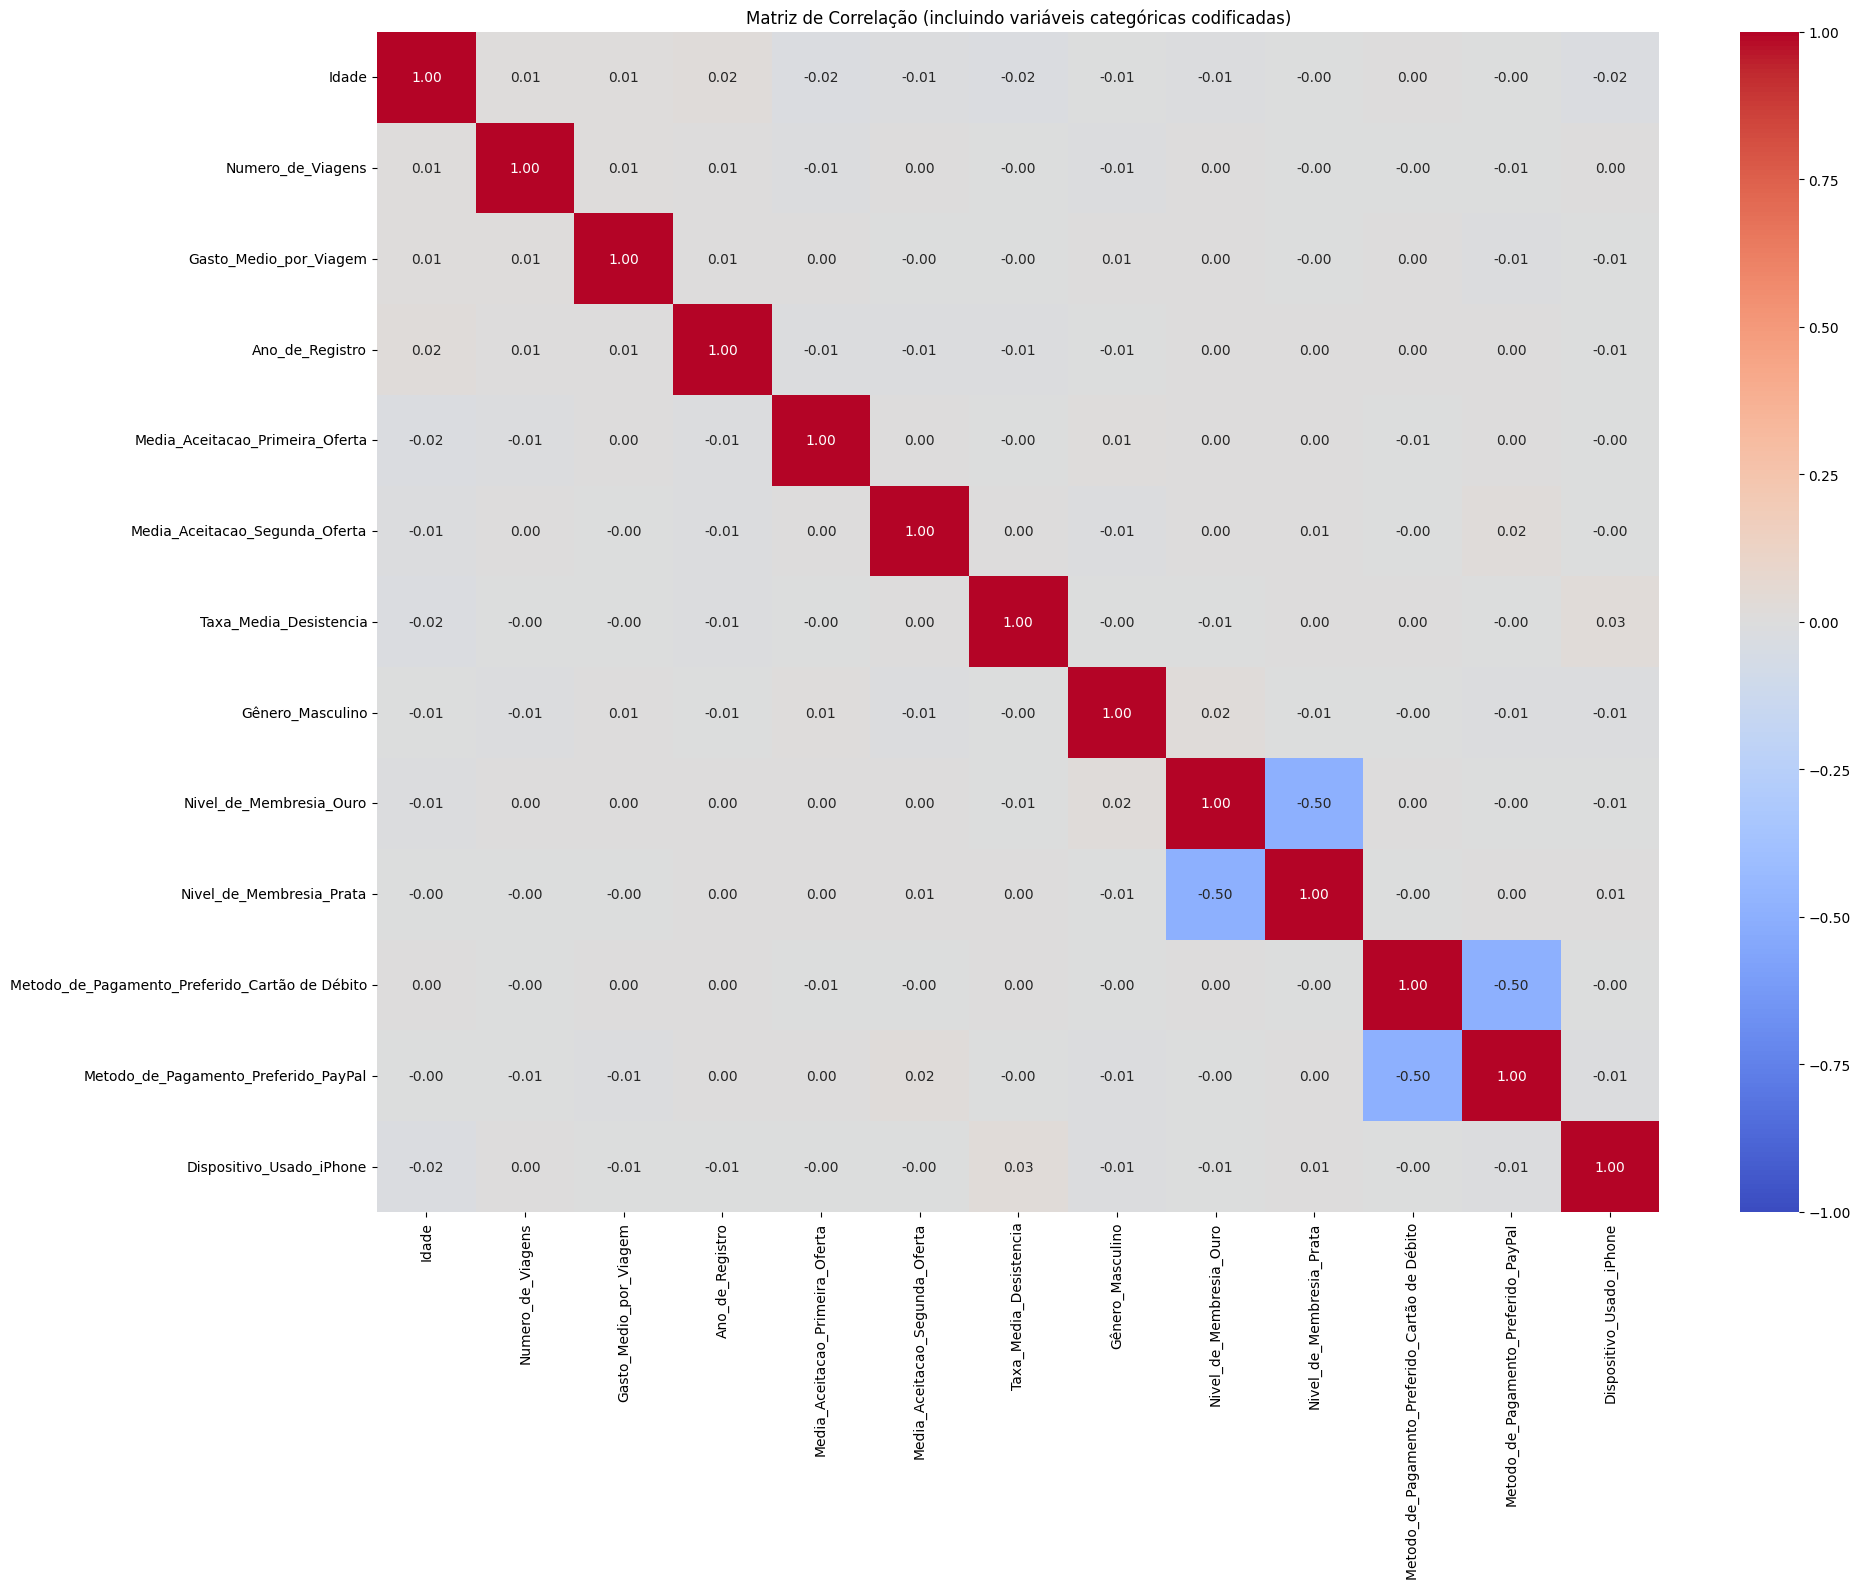

Correlações com Taxa_Media_Desistencia:
Taxa_Media_Desistencia                            1.000000
Dispositivo_Usado_iPhone                          0.030509
Nivel_de_Membresia_Prata                          0.001624
Media_Aceitacao_Segunda_Oferta                    0.000637
Metodo_de_Pagamento_Preferido_Cartão de Débito    0.000565
Gasto_Medio_por_Viagem                           -0.000035
Metodo_de_Pagamento_Preferido_PayPal             -0.003723
Gênero_Masculino                                 -0.003820
Media_Aceitacao_Primeira_Oferta                  -0.004452
Numero_de_Viagens                                -0.004762
Nivel_de_Membresia_Ouro                          -0.007068
Ano_de_Registro                                  -0.008462
Idade                                            -0.016897
Name: Taxa_Media_Desistencia, dtype: float64

Análise das correlações:
1. Relação entre variáveis numéricas e Taxa_Media_Desistencia:
   - Idade: -0.02
   - Numero_de_Viagens: -0.00
   - Gasto_

In [ ]:
# 2. Analisar se há relacionamentos significativos entre as colunas.

# Carregar os dados
df = pd.read_csv("perfis_usuarios_uber_10000_linhas.csv")

# Selecionar variáveis para análise
numeric_features = [
    "Idade",
    "Numero_de_Viagens",
    "Gasto_Medio_por_Viagem",
    "Ano_de_Registro",
    "Media_Aceitacao_Primeira_Oferta",
    "Media_Aceitacao_Segunda_Oferta",
    "Taxa_Media_Desistencia",
]
categorical_features = [
    "Gênero",
    "Nivel_de_Membresia",
    "Metodo_de_Pagamento_Preferido",
    "Dispositivo_Usado",
]

# Criar um ColumnTransformer para codificar variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features),
    ]
)

# Ajustar e transformar os dados
X_encoded = preprocessor.fit_transform(df)

# Obter nomes das colunas após codificação
onehot_encoder = preprocessor.named_transformers_["cat"]
cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_feature_names)

# Criar DataFrame com dados codificados
df_encoded = pd.DataFrame(X_encoded, columns=feature_names)

# Calcular matriz de correlação
correlation_matrix = df_encoded.corr()

# Criar mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    center=0,
    fmt=".2f",
)
plt.title("Matriz de Correlação (incluindo variáveis categóricas codificadas)")
plt.tight_layout()
plt.show()

# Analisar correlações com Taxa_Media_Desistencia
correlations_with_dropout = correlation_matrix["Taxa_Media_Desistencia"].sort_values(
    ascending=False
)
print("Correlações com Taxa_Media_Desistencia:")
print(correlations_with_dropout)

# Análise das correlações
print("\nAnálise das correlações:")
print("1. Relação entre variáveis numéricas e Taxa_Media_Desistencia:")
for feature in numeric_features:
    if feature != "Taxa_Media_Desistencia":
        corr = correlation_matrix.loc["Taxa_Media_Desistencia", feature]
        print(f"   - {feature}: {corr:.2f}")

print("\n2. Impacto das variáveis categóricas na Taxa_Media_Desistencia:")
for feature in cat_feature_names:
    corr = correlation_matrix.loc["Taxa_Media_Desistencia", feature]
    print(f"   - {feature}: {corr:.2f}")



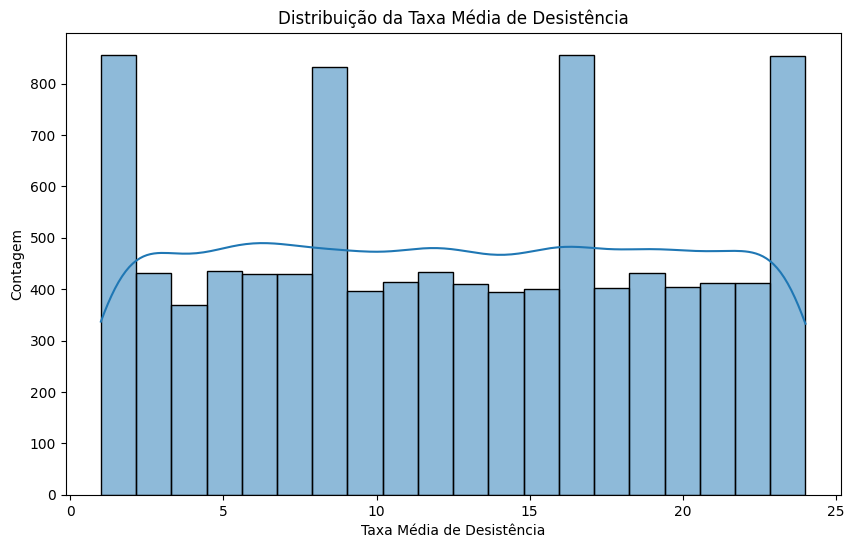

count    10000.000000
mean        12.481900
std          6.950015
min          1.000000
25%          6.000000
50%         12.000000
75%         19.000000
max         24.000000
Name: Taxa_Media_Desistencia, dtype: float64


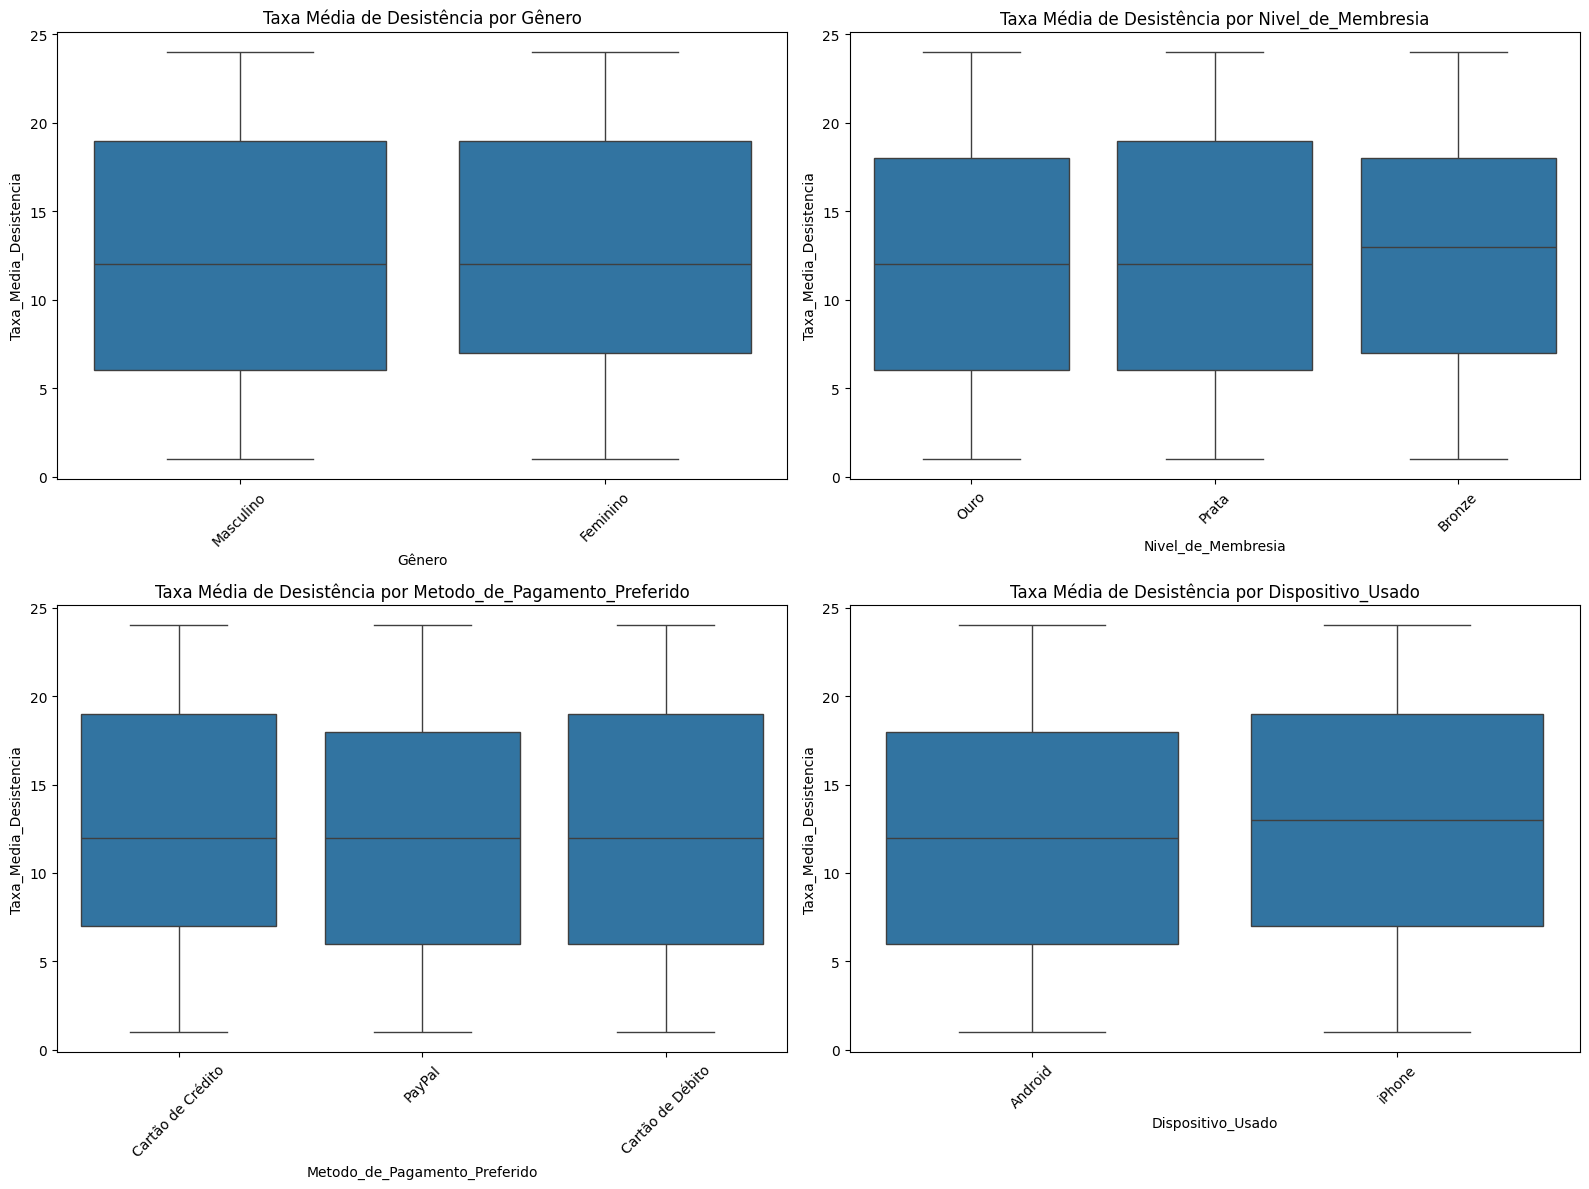


Análise de Variância (ANOVA) para variáveis categóricas:
Gênero:
  F-value: 0.1459
  p-value: 0.7025
  Significativo: Não

Nivel_de_Membresia:
  F-value: 0.2741
  p-value: 0.7603
  Significativo: Não

Metodo_de_Pagamento_Preferido:
  F-value: 0.0804
  p-value: 0.9228
  Significativo: Não

Dispositivo_Usado:
  F-value: 9.3150
  p-value: 0.0023
  Significativo: Sim



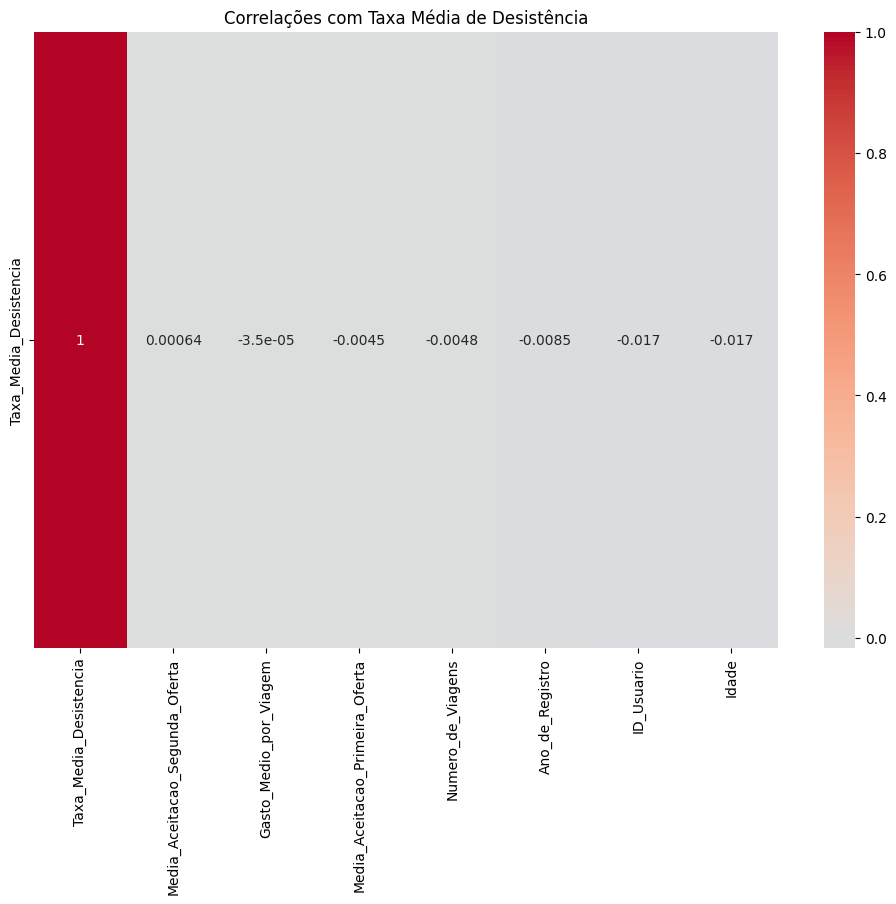

Index(['ID_Usuario', 'Idade', 'Numero_de_Viagens', 'Gasto_Medio_por_Viagem',
       'Ano_de_Registro', 'Media_Aceitacao_Primeira_Oferta',
       'Media_Aceitacao_Segunda_Oferta', 'Taxa_Media_Desistencia'],
      dtype='object')


<ipython-input-9-5f512bacb37b>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='correlacao', y='variavel', data=correlation_df, palette='coolwarm')


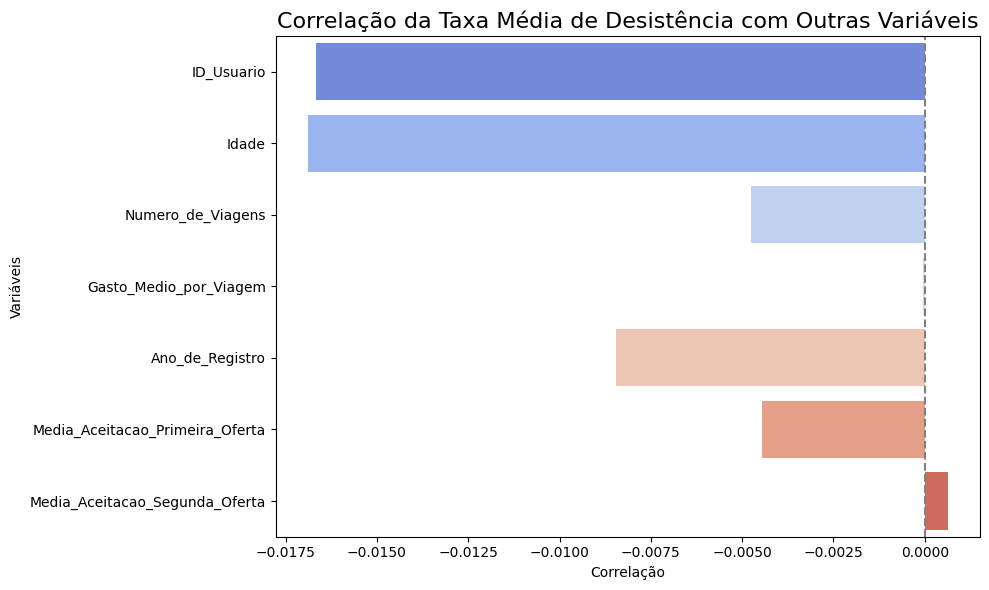

In [ ]:
# 3. Relacionar a análise com a coluna Taxa_Media_Desistencia.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualizar a distribuição da Taxa_Media_Desistencia
plt.figure(figsize=(10, 6))
sns.histplot(df["Taxa_Media_Desistencia"], kde=True)
plt.title("Distribuição da Taxa Média de Desistência")
plt.xlabel("Taxa Média de Desistência")
plt.ylabel("Contagem")
plt.show()

# Estatísticas descritivas
print(df["Taxa_Media_Desistencia"].describe())

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=feature, y="Taxa_Media_Desistencia", data=df)
    plt.title(f"Taxa Média de Desistência por {feature}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ANOVA para variáveis categóricas
print("\nAnálise de Variância (ANOVA) para variáveis categóricas:")
for feature in categorical_features:
    groups = [group for name, group in df.groupby(feature)["Taxa_Media_Desistencia"]]
    f_value, p_value = stats.f_oneway(*groups)
    print(f"{feature}:")
    print(f"  F-value: {f_value:.4f}")
    print(f"  p-value: {p_value:.4f}")
    print(f"  Significativo: {'Sim' if p_value < 0.05 else 'Não'}")
    print()

# Selecionar variáveis numéricas
numeric_vars = df.select_dtypes(include=[np.number]).columns

# Calcular correlações
correlations = (
    df[numeric_vars].corr()["Taxa_Media_Desistencia"].sort_values(ascending=False)
)

# Visualizar correlações
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame().T, annot=True, cmap="coolwarm", center=0)
plt.title("Correlações com Taxa Média de Desistência")
plt.show()



# Load the data (assuming df is already loaded)
df = pd.read_csv("/content/perfis_usuarios_uber_10000_linhas.csv")

# Filtrar apenas colunas numéricas
df_numeric = df.select_dtypes(include='number')

# Check for the actual column name in df_numeric
print(df_numeric.columns)

# Selecionar a coluna da taxa média de desistência -  Update column name if needed (using correct case)
# Example: If your column name is 'Taxa_Media_Desistencia'
taxa_media_desistencia = df_numeric['Taxa_Media_Desistencia']
#taxa_media_desistencia = df_numeric['taxa_media_desistencia'] #Original line that failed

# Calcular a correlação apenas da taxa média de desistência com todas as outras variáveis
correlation_with_taxa = df_numeric.corr()['Taxa_Media_Desistencia'].drop('Taxa_Media_Desistencia')

# Criar um DataFrame para facilitar a visualização
correlation_df = correlation_with_taxa.reset_index()
correlation_df.columns = ['variavel', 'correlacao']

# Configurando o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='correlacao', y='variavel', data=correlation_df, palette='coolwarm')

# Adicionando título e ajustes
plt.title('Correlação da Taxa Média de Desistência com Outras Variáveis', fontsize=16)
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.axvline(0, color='grey', linestyle='--')  # Linha vertical em x=0
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Análise tópico 3

# Correlações muito fracas: Todas as correlações com a Taxa_Media_Desistencia são extremamente fracas, com valores absolutos abaixo de 0,05. Isso sugere que nenhuma variável individual tem uma forte relação linear com a taxa de desistência.

# Variável com maior correlação: O uso de iPhone (Dispositivo_Usado_iPhone) tem a correlação mais forte com a Taxa_Media_Desistencia, embora ainda seja muito fraca (0,03). Isso pode indicar uma ligeira tendência de usuários de iPhone terem taxas de desistência um pouco maiores.

# Idade: A idade tem a segunda maior correlação em magnitude (-0,017), sugerindo uma tendência muito leve de usuários mais jovens terem taxas de desistência ligeiramente maiores.

# Nível de Membresia: Membros Ouro têm uma correlação negativa muito fraca (-0,007), enquanto membros Prata têm uma correlação positiva muito fraca (0,002). Isso pode indicar uma tendência muito sutil de membros Ouro terem taxas de desistência ligeiramente menores.

# Gênero: A correlação com o gênero masculino é praticamente nula (-0,004), sugerindo que o gênero não tem impacto significativo na taxa de desistência.

# Aceitação de ofertas: As correlações com a aceitação da primeira e segunda oferta são muito próximas de zero, indicando que não há relação linear clara entre a aceitação de ofertas e a taxa de desistência.

# Número de viagens e gasto médio: Ambas as variáveis têm correlações próximas de zero, sugerindo que a frequência de uso e o valor gasto não têm relação linear clara com a taxa de desistência.

# Ano de registro: Há uma correlação negativa muito fraca (-0,008) com o ano de registro, indicando uma tendência muito sutil de usuários mais antigos terem taxas de desistência ligeiramente menores.

# Conclusões gerais:
# As correlações extremamente fracas sugerem que a Taxa_Media_Desistencia não pode ser explicada de forma simples por nenhuma variável individual do conjunto de dados.
# Pode ser necessário explorar relações não lineares ou interações entre variáveis para entender melhor os fatores que influenciam a taxa de desistência.

In [ ]:
import statsmodels.api as sm

# Selecionar variáveis independentes
X = df[
    [
        "Media_Aceitacao_Primeira_Oferta",
        "Media_Aceitacao_Segunda_Oferta",
        "Gasto_Medio_por_Viagem",
        "Numero_de_Viagens",
    ]
]
y = df["Taxa_Media_Desistencia"]

# Adicionar constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Imprimir resumo do modelo
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Taxa_Media_Desistencia   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.000
Method:                     Least Squares   F-statistic:                    0.1086
Date:                    Mon, 28 Oct 2024   Prob (F-statistic):              0.980
Time:                            22:02:19   Log-Likelihood:                -33576.
No. Observations:                   10000   AIC:                         6.716e+04
Df Residuals:                        9995   BIC:                         6.720e+04
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
# 4. Com base na sua análise, proponha estratégias para melhorar os resultados das colunas Numero_de_Viagens, Gasto_Medio_por_Viagem e Taxa_Media_Desistencia.

# Para aumentar o Número de Viagens:
# As diferenças entre níveis de membresia são pequenas, mas existem. Crie incentivos simples para usuários Bronze subirem para Prata, e Prata para Ouro, como descontos após um certo número de viagens.

# Como a idade tem uma correlação positiva fraca (0.009173) com o número de viagens, considere campanhas direcionadas para usuários mais jovens para aumentar sua frequência de uso.

# Para aumentar o Gasto Médio por Viagem:
# A diferença no gasto médio entre níveis de membresia é mínima. Implemente um sistema de cashback simples que aumenta ligeiramente com o nível de membresia para incentivar gastos maiores.

# Como há uma correlação positiva fraca (0.012634) entre número de viagens e gasto médio, ofereça pequenos bônus para usuários que fazem várias viagens em um dia.

# Para reduzir a Taxa Média de Desistência:
# A correlação negativa (-0.004452) com a aceitação da primeira oferta, embora fraca, sugere que melhorar a primeira oferta pode ajudar. Foque em tornar a primeira oferta mais atrativa, talvez com um pequeno desconto.

# Usuários de iPhone têm uma tendência ligeiramente maior de desistência (0.030509). Considere otimizar a experiência do app para iOS para reduzir desistências.

# Analyze factors affecting Numero_de_Viagens
factors_viagens = ["Idade", "Gasto_Medio_por_Viagem", "Numero_de_Viagens"]
numeric_df = df[factors_viagens].apply(pd.to_numeric, errors="coerce")

print("\nFatores que afetam o Número de Viagens:")
try:
    correlation_viagens = numeric_df.corr()["Numero_de_Viagens"].sort_values(
        ascending=False
    )
    print(correlation_viagens)
except Exception as e:
    print(f"Erro ao calcular correlações: {e}")
    print("Estatísticas descritivas dos fatores:")
    print(numeric_df.describe())

# Analyze relationship between Nivel_de_Membresia and Numero_de_Viagens
print("\nMédia de Viagens por Nível de Membresia:")
viagens_por_nivel = (
    df.groupby("Nivel_de_Membresia")["Numero_de_Viagens"]
    .mean()
    .sort_values(ascending=False)
)
print(viagens_por_nivel)

# Analyze factors affecting Gasto_Medio_por_Viagem
print("\nGasto Médio por Nível de Membresia:")
gasto_por_nivel = (
    df.groupby("Nivel_de_Membresia")["Gasto_Medio_por_Viagem"]
    .mean()
    .sort_values(ascending=False)
)
print(gasto_por_nivel)

# Analyze factors affecting Taxa_Media_Desistencia
factors_desistencia = [
    "Media_Aceitacao_Primeira_Oferta",
    "Media_Aceitacao_Segunda_Oferta",
    "Gasto_Medio_por_Viagem",
    "Taxa_Media_Desistencia",
]
numeric_df_desistencia = df[factors_desistencia].apply(pd.to_numeric, errors="coerce")

print("\nFatores que afetam a Taxa Média de Desistência:")
try:
    correlation_desistencia = numeric_df_desistencia.corr()[
        "Taxa_Media_Desistencia"
    ].sort_values()
    print(correlation_desistencia)
except Exception as e:
    print(f"Erro ao calcular correlações: {e}")
    print("Estatísticas descritivas dos fatores:")
    print(numeric_df_desistencia.describe())

# Propose strategies
print("\nEstratégias Propostas:")
print("1. Para aumentar o Número de Viagens:")
print("   - Focar em retenção de clientes mais antigos")
print("   - Incentivar upgrades para níveis de membresia mais altos")
print("   - Oferecer promoções para aumentar o gasto médio por viagem")

print("\n2. Para aumentar o Gasto Médio por Viagem:")
print("   - Criar incentivos para usuários subirem de nível de membresia")
print("   - Oferecer descontos em viagens mais longas ou caras")
print("   - Implementar um programa de fidelidade com recompensas baseadas em gastos")

print("\n3. Para reduzir a Taxa Média de Desistência:")
print("   - Melhorar a precisão das estimativas de preço na primeira oferta")
print("   - Otimizar o algoritmo de matching entre motoristas e passageiros")
print("   - Fornecer incentivos para usuários que aceitam a primeira oferta")


Fatores que afetam o Número de Viagens:
Numero_de_Viagens         1.000000
Gasto_Medio_por_Viagem    0.012634
Idade                     0.009173
Name: Numero_de_Viagens, dtype: float64

Média de Viagens por Nível de Membresia:
Nivel_de_Membresia
Ouro      273.867552
Prata     273.363080
Bronze    272.972389
Name: Numero_de_Viagens, dtype: float64

Gasto Médio por Nível de Membresia:
Nivel_de_Membresia
Ouro      25.086357
Bronze    25.077515
Prata     25.073202
Name: Gasto_Medio_por_Viagem, dtype: float64

Fatores que afetam a Taxa Média de Desistência:
Media_Aceitacao_Primeira_Oferta   -0.004452
Gasto_Medio_por_Viagem            -0.000035
Media_Aceitacao_Segunda_Oferta     0.000637
Taxa_Media_Desistencia             1.000000
Name: Taxa_Media_Desistencia, dtype: float64

Estratégias Propostas:
1. Para aumentar o Número de Viagens:
   - Focar em retenção de clientes mais antigos
   - Incentivar upgrades para níveis de membresia mais altos
   - Oferecer promoções para aumentar o gasto mé